# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city.replace(' ', '+')}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | nizhniy ingash
Processing Record 3 of Set 1 | smirnovo
Processing Record 4 of Set 1 | thompson
Processing Record 5 of Set 1 | gjovik
Processing Record 6 of Set 1 | yellowknife
Processing Record 7 of Set 1 | edinburgh of the seven seas
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | tsiombe
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | new norfolk
Processing Record 14 of Set 1 | alice springs
Processing Record 15 of Set 1 | san antonio de pale
Processing Record 16 of Set 1 | tarawa
Processing Record 17 of Set 1 | obubra
Processing Record 18 of Set 1 | nassau
Processing Record 19 of Set 1 | carnarvon
Processing Record 20 of Set 1 | quiberon
Processing Record 21 of Set 1 | kingston
Processing Record 22 of Set 1 | georgetown
Process

Processing Record 41 of Set 4 | aitape
Processing Record 42 of Set 4 | touba
Processing Record 43 of Set 4 | kailua-kona
Processing Record 44 of Set 4 | vorgashor
Processing Record 45 of Set 4 | la ronge
Processing Record 46 of Set 4 | roma
Processing Record 47 of Set 4 | fort bragg
Processing Record 48 of Set 4 | altai
Processing Record 49 of Set 4 | mount isa
Processing Record 0 of Set 5 | shuangyang
Processing Record 1 of Set 5 | senador jose porfirio
Processing Record 2 of Set 5 | frontera
Processing Record 3 of Set 5 | arish
Processing Record 4 of Set 5 | seaside
Processing Record 5 of Set 5 | haiku-pauwela
Processing Record 6 of Set 5 | ust-nera
Processing Record 7 of Set 5 | ust'-kalmanka
Processing Record 8 of Set 5 | san ramon de la nueva oran
Processing Record 9 of Set 5 | kajiado
Processing Record 10 of Set 5 | kodinsk
Processing Record 11 of Set 5 | mount gambier
Processing Record 12 of Set 5 | howard springs
Processing Record 13 of Set 5 | cabedelo
Processing Record 14 of 

Processing Record 35 of Set 8 | fort st. john
Processing Record 36 of Set 8 | ndikinimeki
Processing Record 37 of Set 8 | letlhakeng
Processing Record 38 of Set 8 | road town
Processing Record 39 of Set 8 | sitangkai
Processing Record 40 of Set 8 | gizo
Processing Record 41 of Set 8 | kermit
Processing Record 42 of Set 8 | nichinan
Processing Record 43 of Set 8 | kiunga
Processing Record 44 of Set 8 | mailsi
Processing Record 45 of Set 8 | bestobe
Processing Record 46 of Set 8 | sagna
Processing Record 47 of Set 8 | geraldton
Processing Record 48 of Set 8 | port augusta
Processing Record 49 of Set 8 | gore
Processing Record 0 of Set 9 | atafu village
Processing Record 1 of Set 9 | mareeba
Processing Record 2 of Set 9 | magadan
Processing Record 3 of Set 9 | odessa
Processing Record 4 of Set 9 | portland
Processing Record 5 of Set 9 | constantia
Processing Record 6 of Set 9 | bahia honda
Processing Record 7 of Set 9 | yanji
Processing Record 8 of Set 9 | yasnyy
Processing Record 9 of Se

Processing Record 26 of Set 12 | zambezi
Processing Record 27 of Set 12 | torghay
Processing Record 28 of Set 12 | kadugli
Processing Record 29 of Set 12 | mancora
Processing Record 30 of Set 12 | urangan
Processing Record 31 of Set 12 | ciudad pemex
Processing Record 32 of Set 12 | kemi
Processing Record 33 of Set 12 | dayr hafir
Processing Record 34 of Set 12 | mar del plata
Processing Record 35 of Set 12 | kapoeta
Processing Record 36 of Set 12 | ad dabbah
Processing Record 37 of Set 12 | seogwipo
City not found. Skipping...
Processing Record 38 of Set 12 | kismayo
Processing Record 39 of Set 12 | ondjiva
Processing Record 40 of Set 12 | tres palos
Processing Record 41 of Set 12 | bontang
Processing Record 42 of Set 12 | prince rupert
Processing Record 43 of Set 12 | apatity
Processing Record 44 of Set 12 | misratah
Processing Record 45 of Set 12 | gurupi
Processing Record 46 of Set 12 | jwaneng
Processing Record 47 of Set 12 | zhoushan
Processing Record 48 of Set 12 | holualoa
Proc

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          598
Lat           598
Lng           598
Max Temp      598
Humidity      598
Cloudiness    598
Wind Speed    598
Country       598
Date          598
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,294.55,49,8,0.89,AU,1702254794
1,nizhniy ingash,56.2000,96.5300,238.52,100,18,0.24,RU,1702254794
2,smirnovo,54.5125,69.4222,237.17,98,22,3.05,KZ,1702254794
3,thompson,55.7435,-97.8558,257.24,92,100,2.06,CA,1702254673
4,gjovik,60.7947,10.6929,268.09,97,100,1.27,NO,1702254795


In [6]:
import os
#Permissions were denied to conect to data_output folder
# Create the 'output_data' directory
output_data_dir = os.path.join("output_data")
output_file_path = os.path.join(output_data_dir, "cities.csv")


In [7]:
# Export the City_Data into a csv
output_file_path = "output_data/cities.csv"
city_data_df.to_csv(output_file_path, index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,294.55,49,8,0.89,AU,1702254794
1,nizhniy ingash,56.2000,96.5300,238.52,100,18,0.24,RU,1702254794
2,smirnovo,54.5125,69.4222,237.17,98,22,3.05,KZ,1702254794
3,thompson,55.7435,-97.8558,257.24,92,100,2.06,CA,1702254673
4,gjovik,60.7947,10.6929,268.09,97,100,1.27,NO,1702254795


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

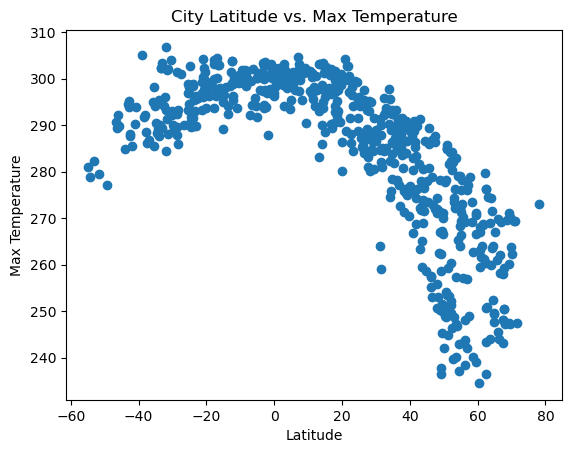

In [12]:
import matplotlib.pyplot as plt

# Scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

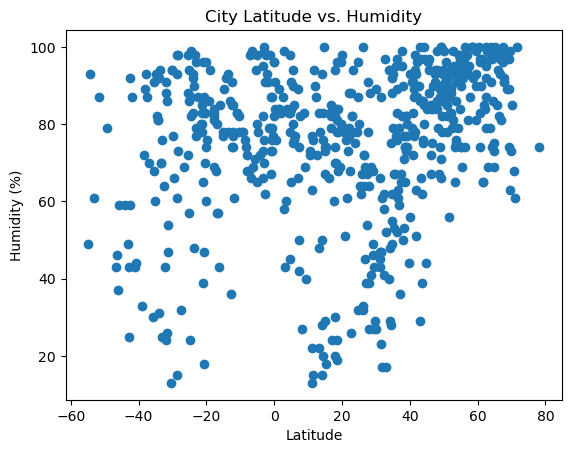

In [13]:
# Scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

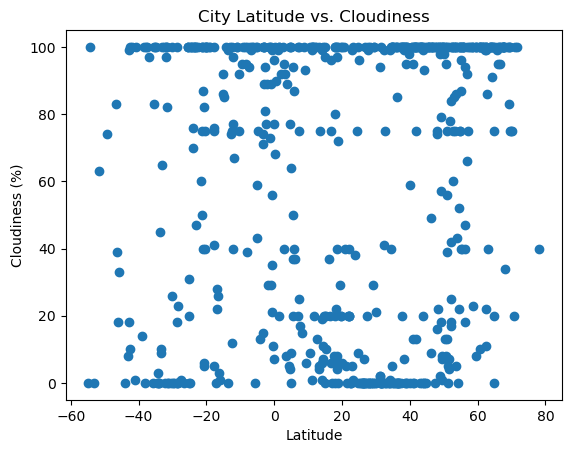

In [14]:
# Scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

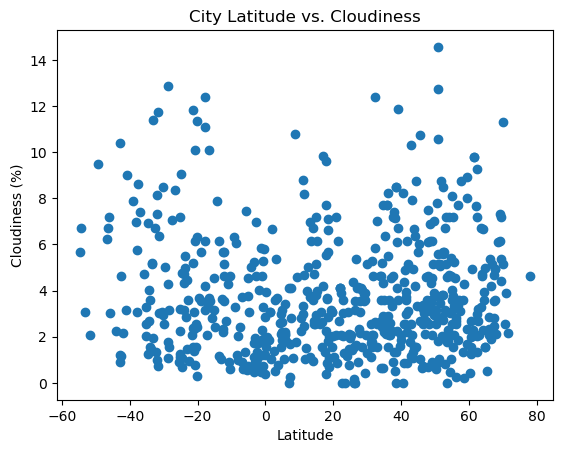

In [15]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots

In [17]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,nizhniy ingash,56.2000,96.5300,238.52,100,18,0.24,RU,1702254794
2,smirnovo,54.5125,69.4222,237.17,98,22,3.05,KZ,1702254794
3,thompson,55.7435,-97.8558,257.24,92,100,2.06,CA,1702254673
4,gjovik,60.7947,10.6929,268.09,97,100,1.27,NO,1702254795
5,yellowknife,62.4560,-114.3525,260.44,92,100,9.26,CA,1702254542


In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,294.55,49,8,0.89,AU,1702254794
6,edinburgh of the seven seas,-37.0676,-12.3116,286.83,70,97,7.42,SH,1702254795
7,adamstown,-25.0660,-130.1015,294.44,57,0,3.19,PN,1702254795
10,tsiombe,-25.3000,45.4833,296.88,88,100,1.13,MG,1702254796
12,new norfolk,-42.7826,147.0587,295.21,25,18,1.20,AU,1702254796


###  Temperature vs. Latitude Linear Regression Plot

The line equation is: y = -0.76x + 307.8
The r-value is: -0.8134916284005218


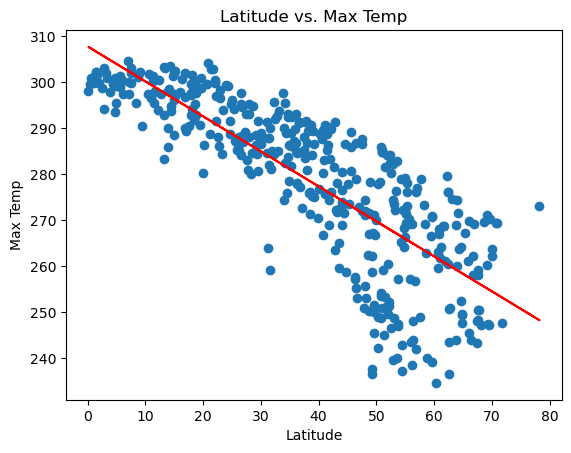

In [19]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.24x + 300.86
The r-value is: 0.5864251784935789


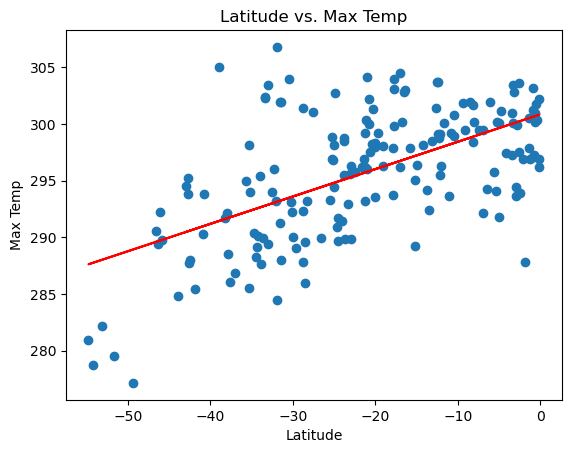

In [21]:
# Linear regression on S Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Max Temp')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

In [22]:
#Response: The temperatures increase the closer the city is to the equator or 0 latitude.

### Humidity vs. Latitude Linear Regression Plot

The line equation is: y = 0.41x + 60.71
The r-value is: 0.3845877139761618


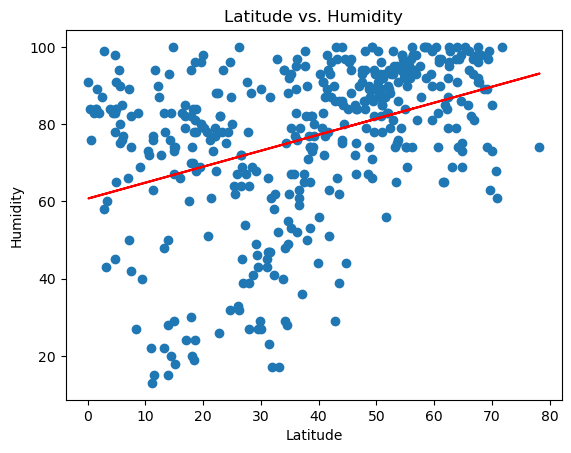

In [23]:
# Linear regression on N Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.46x + 83.68
The r-value is: 0.3208936402128183


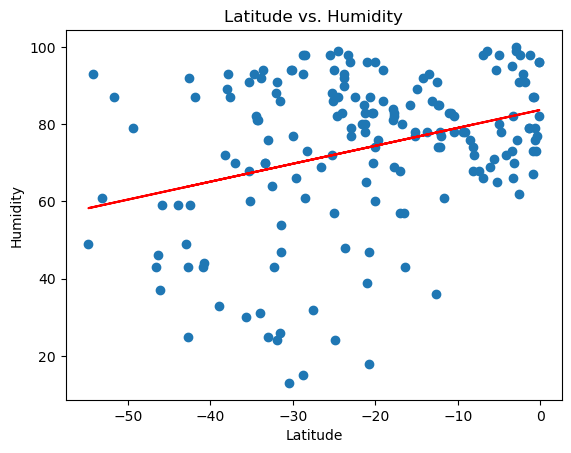

In [24]:
# Linear regression on S Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs. Humidity')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [25]:
#There is no strong relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The line equation is: y = 0.61x + 36.93
The r-value is: 0.2688218333556034


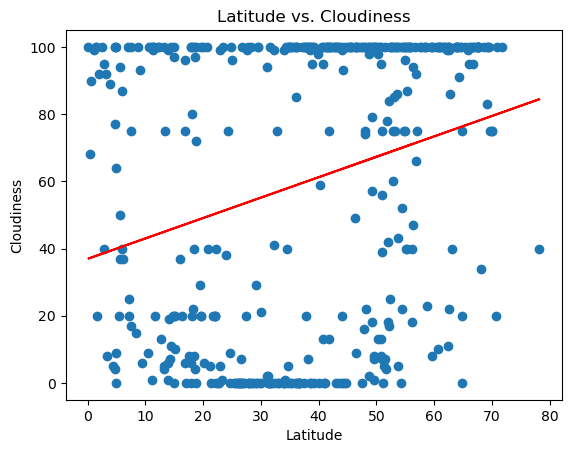

In [26]:
# Linear regression on N Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = 0.69x + 76.97
The r-value is: 0.23834772926960726


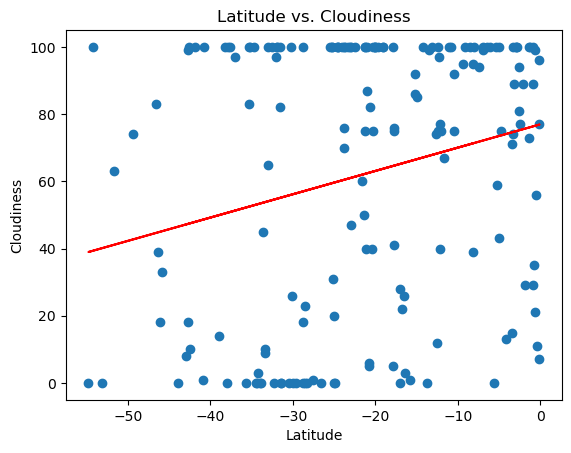

In [27]:
# Linear regression on N Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Latitude vs. Cloudiness')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

In [28]:
#There is litle to no correlation between latitue and cloudiness

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The line equation is: y = 0.02x + 2.86
The r-value is: 0.16691722707537904


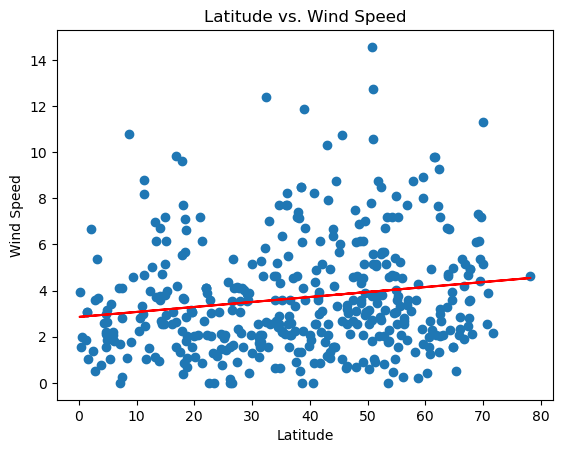

In [29]:
# Linear regression on N Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

The line equation is: y = -0.05x + 2.87
The r-value is: -0.24912802945496873


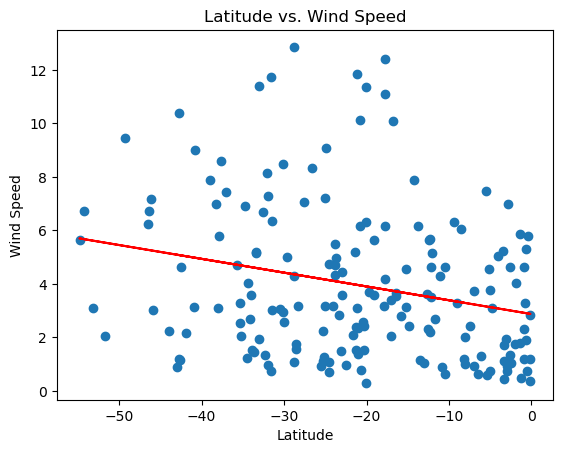

In [30]:
# Linear regression on N Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

#Slope
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Make Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed')

#Line & R Value
print(f"The line equation is: {line_eq}")
print(f"The r-value is: {rvalue}")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [33]:
#There is no correlation between wind speed and latitude on either hemisphere. 